170498071/170498071 [==============================] - 70s 0us/step
Epoch 1/20
391/391 [==============================] - 53s 130ms/step - loss: 1.4879 - accuracy: 0.4660 - val_loss: 1.1828 - val_accuracy: 0.5872
Epoch 2/20
391/391 [==============================] - 49s 126ms/step - loss: 1.1048 - accuracy: 0.6122 - val_loss: 1.0560 - val_accuracy: 0.6337
Epoch 3/20
391/391 [==============================] - 50s 128ms/step - loss: 0.9629 - accuracy: 0.6642 - val_loss: 0.9615 - val_accuracy: 0.6697
Epoch 4/20
391/391 [==============================] - 50s 129ms/step - loss: 0.8669 - accuracy: 0.6993 - val_loss: 0.9113 - val_accuracy: 0.6875
Epoch 5/20
391/391 [==============================] - 50s 128ms/step - loss: 0.7918 - accuracy: 0.7240 - val_loss: 0.8710 - val_accuracy: 0.7012
Epoch 6/20
391/391 [==============================] - 50s 128ms/step - loss: 0.7336 - accuracy: 0.7452 - val_loss: 0.8727 - val_accuracy: 0.6989
Epoch 7/20
391/391 [==============================] - 50s 129m

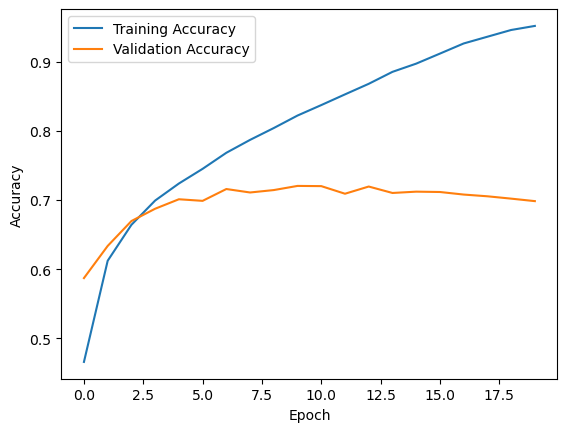

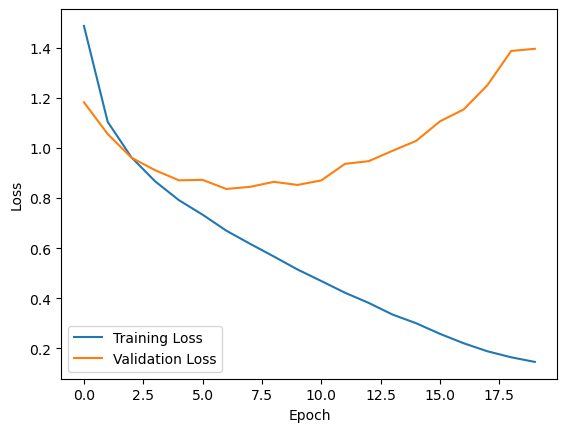

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the ConvNet architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
